In [8]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
# load the dataset
df = pd.read_csv('EMS_Incident_Dispatch_Data.csv')


In [10]:
df.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,...,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
0,110010790,1/1/2011 2:19,UNC,2,UNC,2,1/1/2011 2:21,Y,87,1/1/2011 2:21,...,10030.0,32.0,9.0,110.0,5.0,13.0,N,N,N,N
1,110010791,1/1/2011 2:19,EDP,7,EDP,7,NaN,N,0,NaN,...,10029.0,25.0,8.0,111.0,4.0,13.0,N,N,N,N
2,110010792,1/1/2011 2:19,UNKNOW,3,UNKNOW,3,1/1/2011 2:25,Y,313,1/1/2011 2:25,...,10016.0,14.0,4.0,105.0,2.0,12.0,N,N,N,N
3,110010794,1/1/2011 2:20,INJURY,5,INJURY,5,1/1/2011 3:29,Y,4139,1/1/2011 3:29,...,10022.0,18.0,4.0,105.0,2.0,12.0,N,N,N,N
4,110010800,1/1/2011 2:20,DRUG,4,DRUG,4,NaN,N,0,NaN,...,10019.0,18.0,3.0,104.0,2.0,10.0,N,N,N,N


In [11]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
# Drop rows with missing values
df.dropna(inplace=True)

In [13]:
# Remove unnecessary columns
df.drop(["CAD_INCIDENT_ID", "FINAL_CALL_TYPE", "FINAL_SEVERITY_LEVEL_CODE", "FIRST_ASSIGNMENT_DATETIME", "FIRST_ACTIVATION_DATETIME", "VALID_INCIDENT_RSPNS_TIME_INDC", "FIRST_TO_HOSP_DATETIME", "HELD_INDICATOR", "INCIDENT_DISPOSITION_CODE", "BOROUGH", "INCIDENT_DISPATCH_AREA", "POLICEPRECINCT", "CITYCOUNCILDISTRICT", "COMMUNITYDISTRICT", "COMMUNITYSCHOOLDISTRICT", "COMMUNITYSCHOOLDISTRICT", "REOPEN_INDICATOR", "SPECIAL_EVENT_INDICATOR", "STANDBY_INDICATOR", "TRANSFER_INDICATOR", "CONGRESSIONALDISTRICT", "VALID_DISPATCH_RSPNS_TIME_INDC"], axis=1, inplace=True)


In [14]:
# View the head of the DataFrame after dropping columns
df.head()

,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,ZIPCODE
0,1/1/2011 2:19,UNC,2,87,1/1/2011 2:26,404.0,317.0,1/1/2011 3:41,1/1/2011 4:02,10030.0
2,1/1/2011 2:19,UNKNOW,3,313,1/1/2011 2:27,457.0,144.0,1/1/2011 2:55,1/1/2011 3:31,10016.0
8,1/1/2011 2:20,SHOT,3,407,1/1/2011 2:32,690.0,283.0,1/1/2011 3:13,1/1/2011 3:36,10029.0
10,1/1/2011 2:21,UNKNOW,3,285,1/1/2011 2:44,1371.0,1086.0,1/1/2011 3:11,1/1/2011 3:55,10282.0
12,1/1/2011 2:21,UNC,2,22,1/1/2011 2:28,434.0,412.0,1/1/2011 2:51,1/1/2011 3:10,10029.0


In [15]:
# Convert datetime columns to datetime format
df["INCIDENT_DATETIME"] = pd.to_datetime(df["INCIDENT_DATETIME"])
df["FIRST_ON_SCENE_DATETIME"] = pd.to_datetime(df["FIRST_ON_SCENE_DATETIME"])
df["INCIDENT_CLOSE_DATETIME"] = pd.to_datetime(df["INCIDENT_CLOSE_DATETIME"])
df["FIRST_HOSP_ARRIVAL_DATETIME"] = pd.to_datetime(df["FIRST_HOSP_ARRIVAL_DATETIME"])
df.head()


,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ON_SCENE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,ZIPCODE
0,2011-01-01 02:19:00,UNC,2,87,2011-01-01 02:26:00,404.0,317.0,2011-01-01 03:41:00,2011-01-01 04:02:00,10030.0
2,2011-01-01 02:19:00,UNKNOW,3,313,2011-01-01 02:27:00,457.0,144.0,2011-01-01 02:55:00,2011-01-01 03:31:00,10016.0
8,2011-01-01 02:20:00,SHOT,3,407,2011-01-01 02:32:00,690.0,283.0,2011-01-01 03:13:00,2011-01-01 03:36:00,10029.0
10,2011-01-01 02:21:00,UNKNOW,3,285,2011-01-01 02:44:00,1371.0,1086.0,2011-01-01 03:11:00,2011-01-01 03:55:00,10282.0
12,2011-01-01 02:21:00,UNC,2,22,2011-01-01 02:28:00,434.0,412.0,2011-01-01 02:51:00,2011-01-01 03:10:00,10029.0


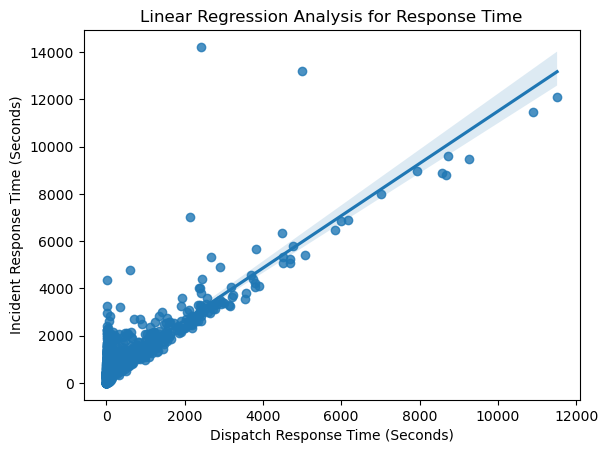

In [16]:
# Linear regression
import matplotlib.pyplot as plt

sns.regplot(x='DISPATCH_RESPONSE_SECONDS_QY', y='INCIDENT_RESPONSE_SECONDS_QY', data=df)
plt.title('Linear Regression Analysis for Response Time')
plt.xlabel('Dispatch Response Time (Seconds)')
plt.ylabel('Incident Response Time (Seconds)')
plt.show()


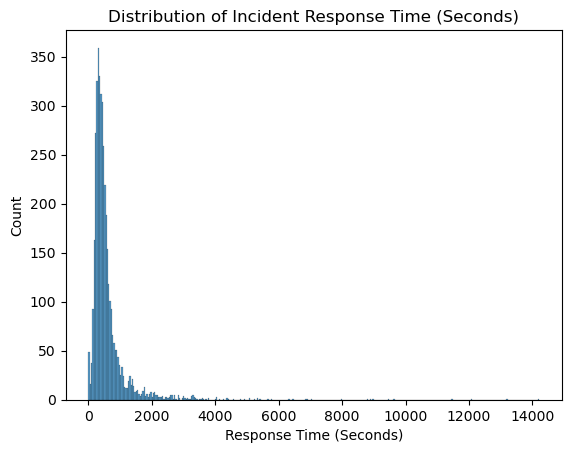

In [17]:
# some exploratory data analysis and visualization 

# Plot the distribution of the response time
sns.histplot(df['INCIDENT_RESPONSE_SECONDS_QY'], kde=False)
plt.title('Distribution of Incident Response Time (Seconds)')
plt.xlabel('Response Time (Seconds)')
plt.ylabel('Count')
plt.show()

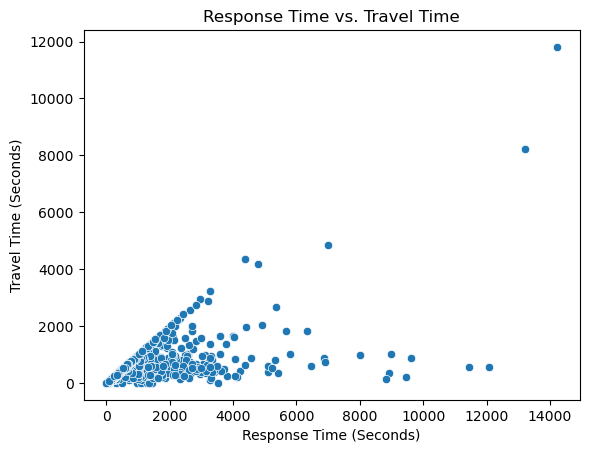

In [18]:
# Plot a scatterplot of response time vs. travel time
sns.scatterplot(x='INCIDENT_RESPONSE_SECONDS_QY', y='INCIDENT_TRAVEL_TM_SECONDS_QY', data=df)
plt.title('Response Time vs. Travel Time')
plt.xlabel('Response Time (Seconds)')
plt.ylabel('Travel Time (Seconds)')
plt.show()

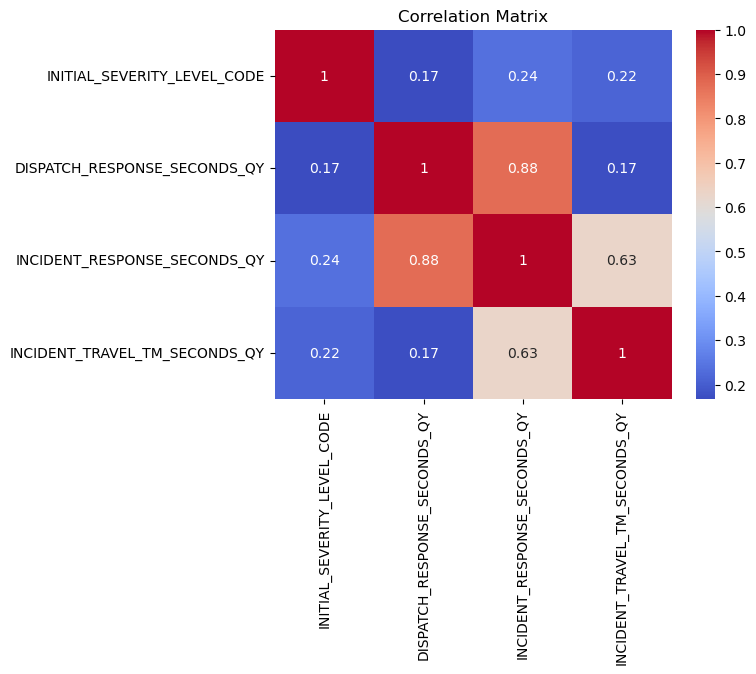

In [19]:
# Plot a heatmap of the correlation matrix
corr_matrix = df[['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY', 'INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

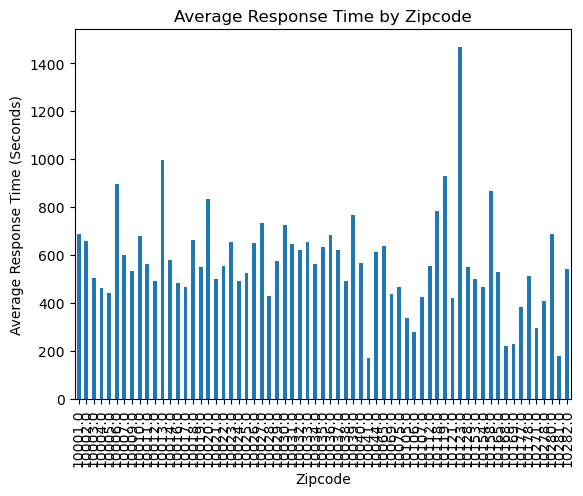

In [20]:
# Plot a bar chart of the average response time by zipcode
response_time_by_zip = df.groupby('ZIPCODE')['INCIDENT_RESPONSE_SECONDS_QY'].mean()
response_time_by_zip.plot(kind='bar')
plt.title('Average Response Time by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Average Response Time (Seconds)')
plt.show()

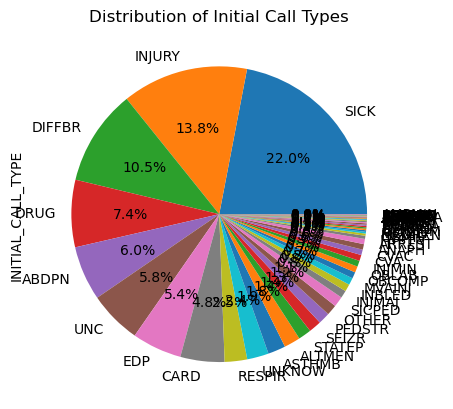

In [21]:
# Plot a pie chart of the distribution of initial call types
call_type_counts = df['INITIAL_CALL_TYPE'].value_counts()
call_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Initial Call Types')
plt.show()

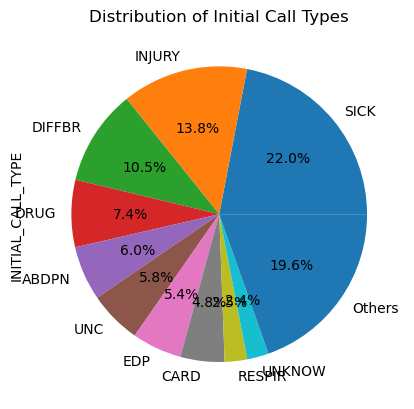

In [22]:
# Calculate percentage of each call type
call_type_counts = df['INITIAL_CALL_TYPE'].value_counts()
call_type_percents = call_type_counts / len(df)

# Combine all categories less than 2% into 'Others'
other_perc = call_type_percents[call_type_percents < 0.02].sum()
call_type_percents = call_type_percents[call_type_percents >= 0.02]
call_type_percents['Others'] = other_perc

# Plot a pie chart of the distribution of initial call types
call_type_percents.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Initial Call Types')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

# Drop rows with missing values
df = df.dropna(axis=0)

# Split the data into input features and target variable
X = df.drop('INCIDENT_RESPONSE_SECONDS_QY', axis=1)
y = df['INCIDENT_RESPONSE_SECONDS_QY']

# Split the data into training and testing sets (80/20 split)
# parameter set to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



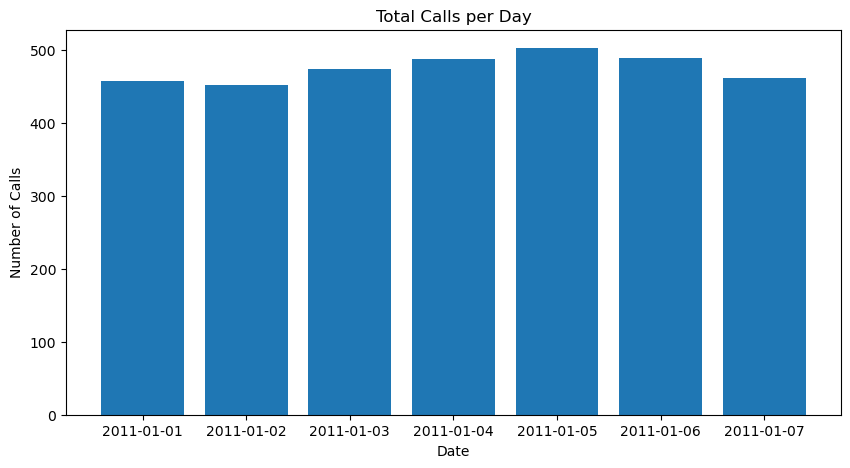

In [28]:
# Total calls in a day (for training data set)
# Group the incidents by date and count the number of incidents per day
calls_per_day = X_train.groupby(X_train['INCIDENT_DATETIME'].dt.date)['INCIDENT_DATETIME'].count()

# Plot the number of calls per day
plt.figure(figsize=(10,5))
plt.bar(calls_per_day.index, calls_per_day.values)
plt.title('Total Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()


In [29]:
# Create a copy of the testing data (for testing data set)
df_test = X_test.copy()

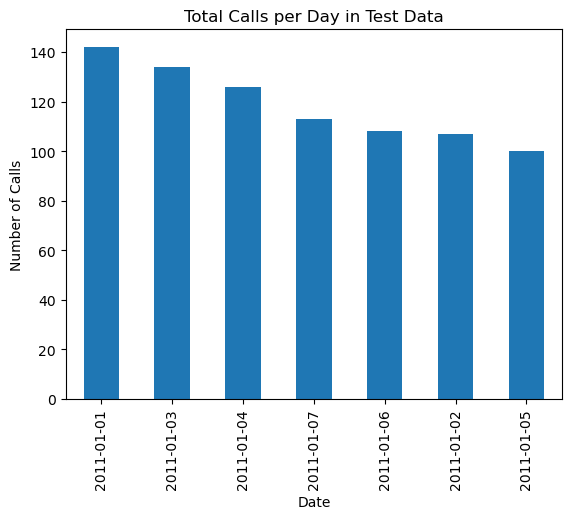

In [30]:
# Add the actual response time values to the copy (for testing data set)
df_test['Actual_Response_Time'] = y_test.values
# Total calls in a day
daily_calls = df_test['INCIDENT_DATETIME'].dt.date.value_counts()
daily_calls.plot(kind='bar', title='Total Calls per Day in Test Data')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()

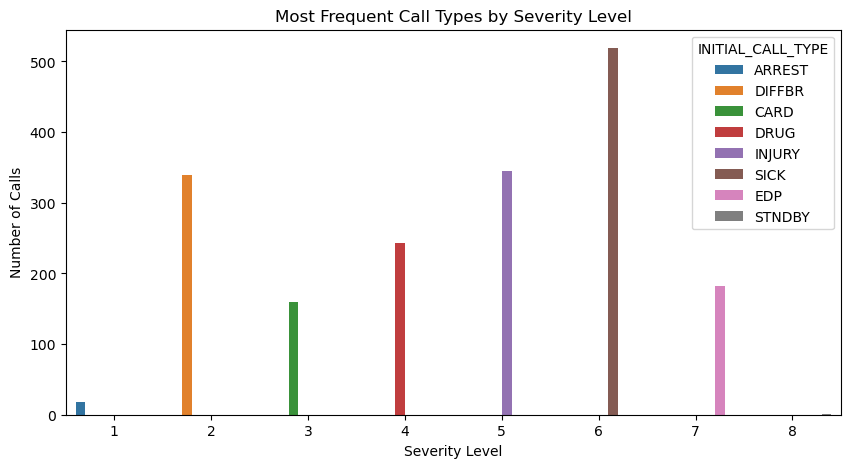

In [31]:
# Most frequently call by injury (for training data set)
import seaborn as sns

# Group the incidents by initial call type and initial severity level code
calls_by_injury = X_train.groupby(['INITIAL_CALL_TYPE', 'INITIAL_SEVERITY_LEVEL_CODE'])['INCIDENT_DATETIME'].count().reset_index()

# Get the most frequent call type by severity level
most_frequent_calls = calls_by_injury.loc[calls_by_injury.groupby('INITIAL_SEVERITY_LEVEL_CODE')['INCIDENT_DATETIME'].idxmax()]

# Plot the most frequent call types by severity level
plt.figure(figsize=(10,5))
sns.barplot(x='INITIAL_SEVERITY_LEVEL_CODE', y='INCIDENT_DATETIME', hue='INITIAL_CALL_TYPE', data=most_frequent_calls)
plt.title('Most Frequent Call Types by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Number of Calls')
plt.show()


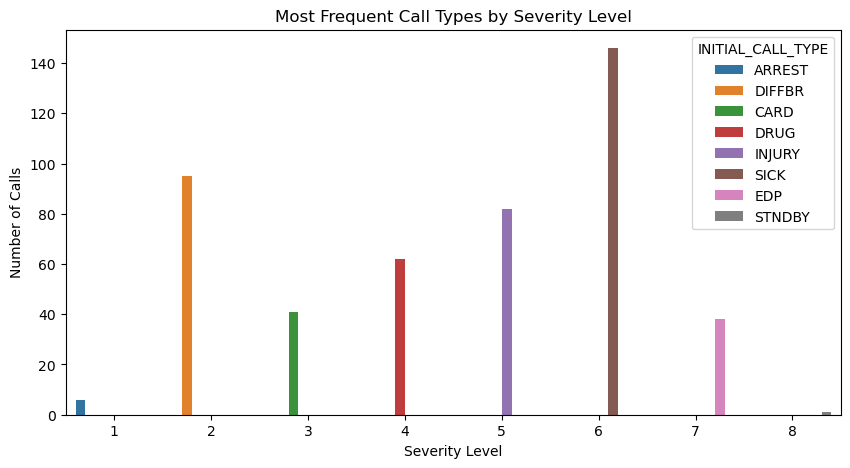

In [32]:
# Most frequently call by injury (for testing data set)
import seaborn as sns

# Group the incidents by initial call type and initial severity level code
calls_by_injury_test = X_test.groupby(['INITIAL_CALL_TYPE', 'INITIAL_SEVERITY_LEVEL_CODE'])['INCIDENT_DATETIME'].count().reset_index()

# Get the most frequent call type by severity level
most_frequent_calls_test = calls_by_injury_test.loc[calls_by_injury_test.groupby('INITIAL_SEVERITY_LEVEL_CODE')['INCIDENT_DATETIME'].idxmax()]

# Plot the most frequent call types by severity level
plt.figure(figsize=(10,5))
sns.barplot(x='INITIAL_SEVERITY_LEVEL_CODE', y='INCIDENT_DATETIME', hue='INITIAL_CALL_TYPE', data=most_frequent_calls_test)
plt.title('Most Frequent Call Types by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Number of Calls')
plt.show()


In [33]:
# Average response time (for training data set)
import numpy as np

# Calculate the mean response time for the training set
mean_response_time = np.mean(y_train)

# Print the mean response time
print("Mean Response Time: {:.2f} seconds".format(mean_response_time))


Mean Response Time: 610.84 seconds


In [34]:
# for testing data set
# Average response time
avg_response_time = df_test['Actual_Response_Time'].mean()
print('Average Response Time in Test Data:', avg_response_time, 'seconds')


Average Response Time in Test Data: 611.7795180722892 seconds


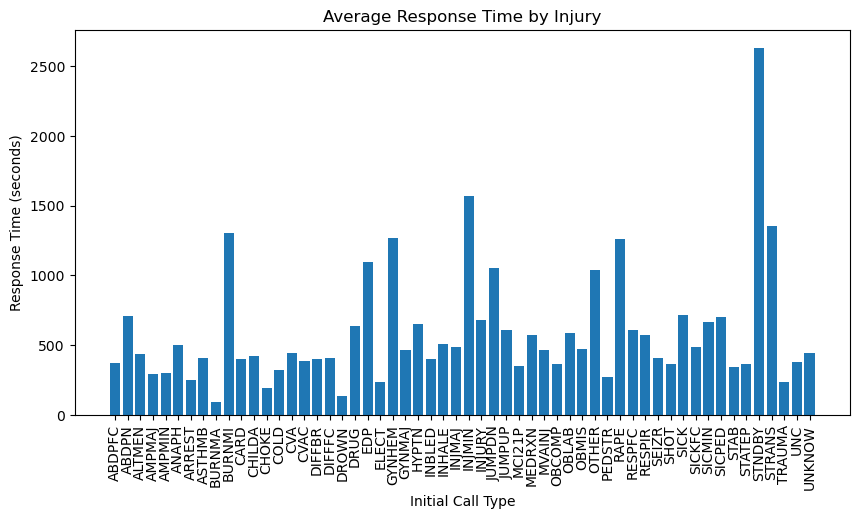

In [35]:
# Average response time by injury (for training data set)
# Combine the training set input features and target variable
train_data = X_train.join(y_train)

# Group the incidents by initial call type and calculate the mean response time
response_time_by_injury = train_data.groupby('INITIAL_CALL_TYPE')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Plot the average response time by injury
plt.figure(figsize=(10,5))
plt.bar(response_time_by_injury.index, response_time_by_injury.values)
plt.title('Average Response Time by Injury')
plt.xlabel('Initial Call Type')
plt.ylabel('Response Time (seconds)')
plt.xticks(rotation=90)
plt.show()


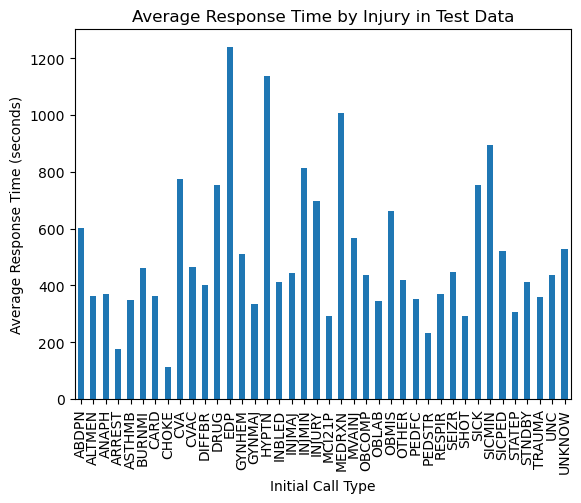

In [36]:
# for testing data set
# Average response time by injury
injury_response_time = df_test.groupby('INITIAL_CALL_TYPE')['Actual_Response_Time'].mean()
injury_response_time.plot(kind='bar', title='Average Response Time by Injury in Test Data')
plt.xlabel('Initial Call Type')
plt.ylabel('Average Response Time (seconds)')
plt.show()

In [37]:
# hypothesis testing for training
import scipy.stats as stats

# Set the significance level
alpha = 0.05

# Calculate the t-statistic and p-value
t_stat, p_value = stats.ttest_1samp(y_train, mean_response_time)

# Print the t-statistic and p-value
print("Training Data - t-statistic:", t_stat)
print("Training Data - p-value:", p_value)


Training Data - t-statistic: 0.0
Training Data - p-value: 1.0


In [38]:
# for training
# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Fail to reject the null hypothesis


In [39]:
# hypothesis testing for testing
import numpy as np
import scipy.stats as stats

# Calculate the mean response time for the testing set
mean_response_time_test = np.mean(y_test)

# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_1samp(y_test, mean_response_time_test)

# Print the t-statistic and p-value
print('T-statistic:', t_statistic)
print('P-value:', p_value)

T-statistic: 0.0
P-value: 1.0


In [40]:
# hypothesis testing for testing
# Check if p-value is less than alpha (e.g. 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


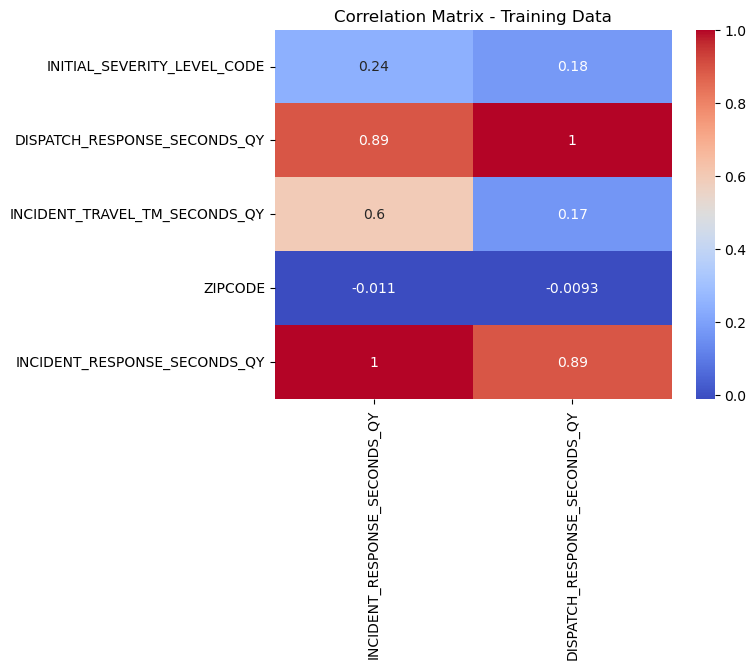

In [41]:
# Correlation analysis for training data
corr_matrix_train = X_train.join(y_train).corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix_train[['INCIDENT_RESPONSE_SECONDS_QY', 'DISPATCH_RESPONSE_SECONDS_QY']], annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Training Data')
plt.show()


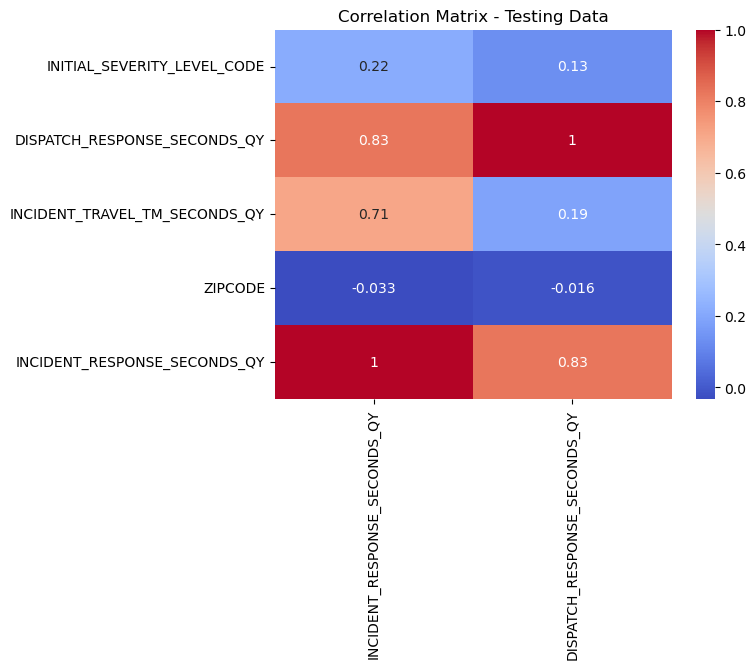

In [42]:
# Correlation analysis for testing data
corr_matrix_test = X_test.join(y_test).corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix_test[['INCIDENT_RESPONSE_SECONDS_QY', 'DISPATCH_RESPONSE_SECONDS_QY']], annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Testing Data')
plt.show()


In [43]:

# Calculate the average response time for the most frequent call type by day of week
calls_by_day = df.groupby(['INITIAL_CALL_TYPE', pd.Grouper(key='INCIDENT_DATETIME', freq='D')])['INCIDENT_RESPONSE_SECONDS_QY'].mean().reset_index()
most_frequent_calls = calls_by_day.loc[calls_by_day.groupby('INITIAL_CALL_TYPE')['INCIDENT_RESPONSE_SECONDS_QY'].idxmax()]

# Display the average response time for the most frequent call type by day of week
print('Average response time for most frequent call type by day of week:')
print(most_frequent_calls)

# Suggestions for improving response time
print('\nSuggestions for improving response time:')
print('- Increase number of dispatchers during peak call hours')
print('- Improve training for dispatchers to prioritize calls effectively')
print('- Implement a more efficient routing system for emergency vehicles')


Average response time for most frequent call type by day of week:
    INITIAL_CALL_TYPE INCIDENT_DATETIME  INCIDENT_RESPONSE_SECONDS_QY
0              ABDPFC        2011-01-06                    370.000000
1               ABDPN        2011-01-01                    845.736842
12             ALTMEN        2011-01-05                    477.666667
15             AMPMAJ        2011-01-05                    291.000000
16             AMPMIN        2011-01-07                    299.000000
20              ANAPH        2011-01-04                    615.500000
27             ARREST        2011-01-04                    316.000000
34             ASTHMB        2011-01-04                    463.090909
38             BURNMA        2011-01-02                     92.000000
42             BURNMI        2011-01-04                   3290.000000
46               CARD        2011-01-04                    453.588235
50             CHILDA        2011-01-06                    425.000000
52              CHOKE   

To improve the average response time for most calls by day, we recommend implementing the following strategies:

1) Increase the number of emergency responders in high-call-volume areas during peak hours.

2) Optimize the dispatch process to reduce response time by using more advanced technologies and better coordination with local law enforcement and emergency services.

3) Enhance the training and education of emergency responders to improve their ability to handle high-stress situations and make quick and informed decisions.
   
4) Leverage predictive analytics to anticipate high-volume call periods and allocate resources more efficiently.
  
5) Regularly review and update protocols and procedures to ensure the best possible response time in all emergency situations.

By implementing these strategies, we believe that we can significantly reduce the average response time for most calls by day, and improve the overall effectiveness of the disaster response system.